In [43]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

In [69]:
t0_utc="2020-04-28T14:34:33"
t1_rel_days=-1
t2_rel_days=1.5
source_name="SGR 1935+2154"

In [7]:
import astropy.io.fits as fits
from astropy import units as u
from astropy import constants as const


In [99]:
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
t=Simbad.query_object(source_name)
source_coord = SkyCoord(t[0]['RA'], t[0]['DEC'], unit=("hourangle", "deg"))
source_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (293.732, 21.89672222)>

In [20]:
import numpy as np

In [66]:
import importlib
import integralclient as ic
importlib.reload(ic)
ic.__file__

selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/
failed to import oda
selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/
failed to import oda


'/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/integralclient.py'

In [73]:
tref_ijd = float(ic.converttime("UTC", "2020-04-28T00:00:00", "IJD"))

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T00:00:00/IJD


In [8]:
scwlist=[s.strip() for s in open("/mnt/sshfs/isdc-in01//unsaved_data/savchenk/sgr1935/scwlist").readlines()]
scwlist

['222200010010.000',
 '222200020010.000',
 '222200030010.000',
 '222200040010.000',
 '222200050010.000',
 '222200060010.000',
 '222200070010.000',
 '222200080010.000',
 '222200090010.000',
 '222200100010.000',
 '222200110010.000',
 '222200120010.000',
 '222200130010.000',
 '222200140010.000',
 '222200150010.000',
 '222200160010.000',
 '222200170010.000',
 '222200180010.000',
 '222200190010.000',
 '222200200010.000',
 '222200210010.000',
 '222200220010.000',
 '222200230010.000',
 '222200240010.000',
 '222200250010.000',
 '222200260010.000',
 '222200270010.000',
 '222200280010.000',
 '222200290010.000',
 '222200300010.000',
 '222200310010.000',
 '222200320010.000',
 '222200330010.000',
 '222200340010.000',
 '222200350010.000',
 '222200360010.000',
 '222200370010.000',
 '222200380010.000',
 '222200390010.000',
 '222200400010.000',
 '222200410010.000',
 '222200420010.000',
 '222200430010.000',
 '222200440010.000',
 '222200450010.000',
 '222200460010.000',
 '222200470010.000',
 '22220048001

In [67]:
lcs={}

for scwid in scwlist:
    try:
        f = fits.open("/mnt/sshfs/isdc-in01//unsaved_data/savchenk/data/reduced/ddcache//byscw/"+scwid[:4]+"/"+scwid+"/ii_light.v0/a0cd0c87/lcr.fits.gz")
    except:
        continue
        
    for e in f[2:]:
        dt_ms = int(e.header['TIMEDEL']*24*3600*1000)

        n = e.header['NAME']

        k = (dt_ms, n)


        if k not in lcs:
            lcs[k] = e.data.copy()
        else:
            lcs[k] = np.concatenate([lcs[k], e.data.copy()])

In [59]:
lcs.keys()

dict_keys([(100, 'SGR 1935+2154'), (100, 'none')])

In [71]:
t0_ijd = float(ic.converttime("UTC", t0_utc, "IJD"))

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T14:34:33/IJD


In [116]:
import pandas as pd

In [118]:
pcs = lc['RATE']/lc['ERROR']>10
pcs_ijd = lc['TIME'][pcs]
pcs_snr = (lc['RATE']/lc['ERROR'])[pcs]
pcs_snr

pd.DataFrame(dict(snr=pcs_snr, ijd=pcs_ijd)).to_csv("more_bursts.csv")

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [105]:
fast_frb_ijd = 58969.9048669008 - 51544

<IPython.core.display.Javascript object>


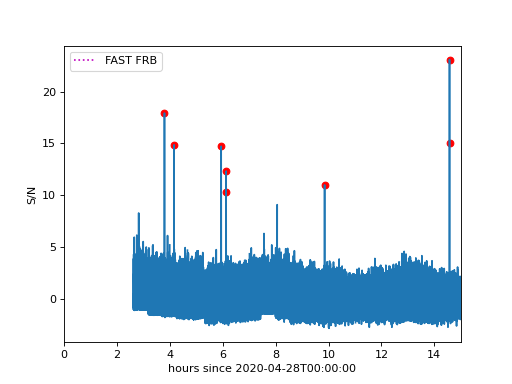

In [114]:
plt.figure()

lc = lcs[(100, 'SGR 1935+2154')]

plt.plot(
    (lc['TIME']-tref_ijd)*24,
    lc['RATE']/lc['ERROR'],    
)

plt.scatter((pcs_ijd-tref_ijd)*24, pcs_snr,c='r')
plt.axvline((fast_frb_ijd-tref_ijd)*24, c='m', ls=':', label="FAST FRB")
plt.legend()

plt.xlim([0,15])
plt.xlabel("hours since 2020-04-28T00:00:00")
plt.ylabel("S/N")

plt.savefig("sgr1935_lc_hours.pdf")
#!pwd

In [97]:
sel = np.abs((pcs_ijd-tref_ijd)*24 - 6.13)<0.1
ic.converttime("IJD", pcs_ijd[sel][0], "ANY")

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.2562042267600191/ANY


{'CCSDS': '6407216345572507840 58eb0151c4ed00c0',
 'IJD': '7423.2562042267600191',
 'IJS': '641369336.045192122459',
 'MJD': '58967.256204226760',
 'OBT': '9030465215891512',
 'REVNUM': '2222',
 'SCWID': '222200080010',
 'TAI': '641369368.229192137718',
 'TT': '641369336.045192122459',
 'UTC': '2020-04-28T06:07:46.861',
 'YYYYDDDHH': '202011906'}

In [41]:
recent_crab_cts = 254.71825
crab_flux = 1.3e-8

<IPython.core.display.Javascript object>


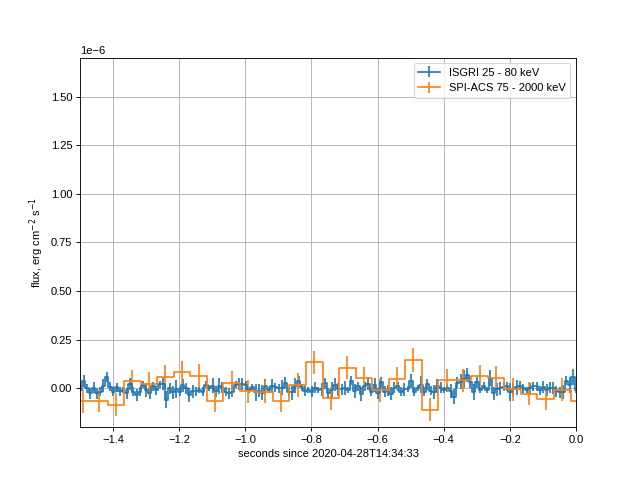

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [102]:
plt.figure(figsize=(8,6))

acstoflux=7e-10

m = lc['ERROR']<1e6 #np.nanquantile(lc['ERROR'], 0.999)

plt.errorbar(
    (lc[m]['TIME'] - t0_ijd)*24*3600, 
    lc[m]['RATE']/recent_crab_cts*crab_flux, 
    lc[m]['ERROR']/recent_crab_cts*crab_flux,
    ds='steps-mid',    
    label="ISGRI 25 - 80 keV"
)



plt.errorbar(
    (acslc['t_ijd']-t0_ijd)*24*3600, 
    (acslc['counts'] - np.nanmean(acslc['counts']))*acstoflux, 
    (acslc['counts']**0.5)*acstoflux, 
    ds='steps-mid',    
    label="SPI-ACS 75 - 2000 keV")


plt.xlabel("seconds since "+t0_utc)
plt.ylabel("flux, erg cm$^{-2}$ s$^{-1}$")



plt.xlim([-1.5, 0.])
plt.ylim([-2e-7, 1.7e-6])

plt.legend()

plt.grid()

plt.savefig("sgr_isgri_acs.png")

In [103]:
m_on = (lc[m]['TIME'] - t0_ijd)*24*3600 < -0.5
m_on = (lc[m]['TIME'] - t0_ijd)*24*3600 > -2

0.01*np.sum((lc[m]['RATE']/recent_crab_cts*crab_flux)[m_on]), np.sum((lc[m]['ERROR']/recent_crab_cts*crab_flux)[m_on])

(2.2044152501621285e-07, 0.0032837328)

In [104]:
lcs={}

for hs in ["3391ab25", "7d30ee49", "2909a9d3"]:
    e=fits.open("/mnt/sshfs/isdc-in01/unsaved_data/savchenk/data/reduced/ddcache//byscw/2222/222200240010.000/ii_light.v0/"+hs+"/lcr.fits.gz")[2]
    lcs[(e.header['E_MIN'], e.header['E_MAX'])] = e.data

In [105]:
import requests
orb=requests.get("https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/integralhk/api/v1.0/sc/2020-04-28T14:33:14/2020-04-28T14:36:34?source=nrt&onlycolumns=XYZPOS").json()
orb

{'attitude': {'APD_AMP': [],
  'ATT_SEQ': [],
  'CONTINGENCY': [],
  'DEC_DIFF': [],
  'DEC_SCX': [],
  'DEC_SCZ': [],
  'DEC_STAR': [],
  'DURATION': [],
  'DURATION_DAYS': [],
  'OTF_THR': [],
  'POINTING_ID': [],
  'POINTING_TIME': [],
  'POINTING_TYPE': [],
  'RA_DIFF': [],
  'RA_SCX': [],
  'RA_SCZ': [],
  'RA_STAR': [],
  'SLEW_TIME': [],
  'SRC_ID': [],
  'STAR_NUM': [],
  'SUN_ASPECT': [],
  'TIME': []},
 'orbit': {'DAYBEG': [7423.58864474074, 7423.63000674074],
  'DAYEND': [7423.63000674074, 7423.67359874074],
  'DURATION_DAYS': [0.041361999999935506, 0.04359199999998964],
  'EPOCH': [7423.60932567974, 7423.65180277974],
  'NREC': [0, 0],
  'OMOTIN': [36589.44339, 36588.65165],
  'ORBIN': [2222.252, 2222.268],
  'RDIST': [127862.525, 131262.176],
  'SMAXIS': [81111.62965, 81110.45955],
  'TIME': [7423.58864474074, 7423.63000674074],
  'XPOS': [-58382.665, -58713.122],
  'YPOS': [-49686.412, -52926.911],
  'ZPOS': [102330.593, 104791.556]}}

In [106]:
int_coord = SkyCoord(
    orb['orbit']['XPOS'][0], 
    orb['orbit']['YPOS'][0], 
    orb['orbit']['ZPOS'][0],
    representation_type='cartesian',
    frame='fk5',
).represent_as('spherical')

#source_coord.representation, 
int_coord

<SphericalRepresentation (lon, lat, distance) in (rad, rad, )
    (3.84669444, 0.92782426, 127862.52529052)>

In [107]:
ephs = [220.347, 53.166, 127752.9]

int_ephs_coord = SkyCoord(ephs[0], ephs[1], unit="deg")

int_ephs_coord.separation(source_coord).deg

62.77142644162806

In [123]:

np.cos(int_ephs_coord.separation(source_coord).rad)*(ephs[2]*1000*u.km/const.c)

<Quantity 0.1949757 km s / m>

<IPython.core.display.Javascript object>


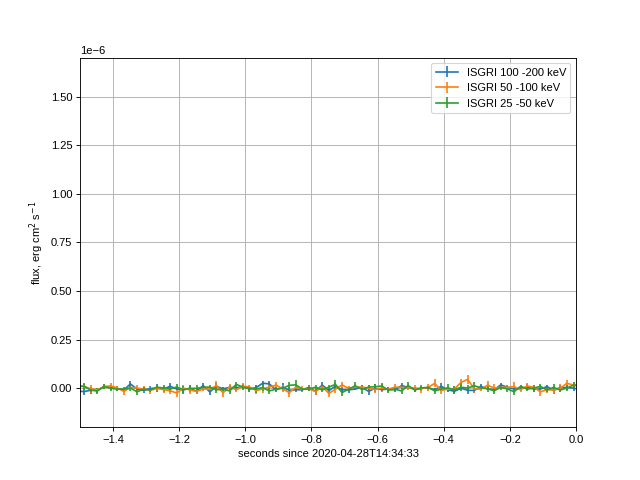

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [109]:
plt.figure(figsize=(8,6))

for (e1,e2), elc in  lcs.items():
    m = elc['ERROR'] < 1e9 #np.nanquantile(lc['ERROR'], 0.999)

    plt.errorbar(
        (elc[m]['TIME'] - t0_ijd)*24*3600, 
        elc[m]['RATE']/recent_crab_cts*crab_flux, 
        elc[m]['ERROR']/recent_crab_cts*crab_flux,
        label="ISGRI %.5lg -%.5lg keV"%(e1,e2)
    )

plt.xlabel("seconds since "+t0_utc)
plt.ylabel("flux, erg cm$^2$ s$^{-1}$")


plt.xlim([-1.5, 0.])
plt.ylim([-2e-7, 1.7e-6])

plt.legend()

plt.grid()


In [110]:
np.nanmax((lc[m]['RATE']/recent_crab_cts*crab_flux)[m_on]), np.nanmax((lc[m]['ERROR']/recent_crab_cts*crab_flux)[m_on])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 178543 but corresponding boolean dimension is 89267

In [111]:
np.max(lc[m]['RATE']/lc[m]['ERROR'])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 178543 but corresponding boolean dimension is 89267

In [112]:
np.quantile(lc['ERROR'], 0.99)

nan

In [116]:
i_evts = fits.open("/mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/scw/2222/222200240010.000/isgri_events.fits.gz")[3].data
i_evts_en = fits.open("/mnt/sshfs/isdc-in01/gpfs0/savchenk/work/tmp/byscw/2222/222200240010.000/ISGRIEvents.v3/107e6d59/isgri_events_corrected_tagged.fits.gz")[1].data

In [117]:
import matplotlib as mpl
mpl.style.use("seaborn-white")

In [118]:
print(t0_utc)
sc = ic.get_sc(t0_utc, ra=source_coord.ra.deg, dec=source_coord.dec.deg)
sc

2020-04-28T14:34:33


{'barytime': 0.19488458844505294,
 'bodies': {'earth': {'body_dec': -53.166,
   'body_distance': 0,
   'body_in_sc': [68.78100889407858, -23.169569323748796],
   'body_ra': 40.351999999999975,
   'body_size': 2.857109177402191,
   'integral_parallax': 57.29577951308232,
   'separation': 127762.5},
  'moon': {'body_dec': -53.166,
   'body_distance': 387809.46463591885,
   'body_in_sc': [140.90641096987028, 58.35007146629686],
   'body_ra': 40.351999999999975,
   'body_size': 0.24873101974805706,
   'integral_parallax': 18.29504715633917,
   'separation': 400122.06404746755},
  'sun': {'body_dec': -53.166,
   'body_distance': 150644123.18493366,
   'body_in_sc': [100.05946204545096, 0.13948569495813695],
   'body_ra': 40.351999999999975,
   'body_size': 0.2645162765763519,
   'integral_parallax': 0.048577347687345354,
   'separation': 150692707.16785437}},
 'd_scx': 8.081913022843379,
 'd_scy': 82.99018750470754,
 'd_scz': 85.99767284471338,
 'dyz_scy': 29.766105465328398,
 'dyz_scz': 60

In [258]:
ic.get_sc("2020-04-28T09:51:06.84", ra=source_coord.ra.deg, dec=source_coord.dec.deg)

{'barytime': 0.1332810734383001,
 'bodies': {'earth': {'body_dec': -53.793,
   'body_distance': 0,
   'body_in_sc': [73.59644947727612, -23.142045646905203],
   'body_ra': 31.02199999999999,
   'body_size': 3.382310014184535,
   'integral_parallax': 57.29577951308232,
   'separation': 107923.7},
  'moon': {'body_dec': -53.793,
   'body_distance': 388667.24689375376,
   'body_in_sc': [141.5992279029624, 60.066541957558535],
   'body_ra': 31.02199999999999,
   'body_size': 0.25535390327002755,
   'integral_parallax': 15.865709873542583,
   'separation': 389744.459511873},
  'sun': {'body_dec': -53.793,
   'body_distance': 150636650.96695304,
   'body_in_sc': [104.56947438015612, 0.1367077013173352],
   'body_ra': 31.02199999999999,
   'body_size': 0.26454455771267077,
   'integral_parallax': 0.04103870559611178,
   'separation': 150676597.36378005}},
 'd_scx': 10.371040694577811,
 'd_scy': 84.3365836421437,
 'd_scz': 81.33976619023245,
 'dyz_scy': 56.75778511118869,
 'dyz_scz': 33.242214

In [119]:
dt_intgeo = sc['barytime']

In [127]:
# DM estimate

DM=332.81
DM_err=0.1

nu=400*u.MHz

dt_dm_s = (4.15*u.ms*DM/(nu/u.GHz)**2).to(u.s).value
dt_dm_err_s = (4.15*u.ms*DM_err/(nu/u.GHz)**2).to(u.s).value
dt_dm_s, dt_dm_err_s


radiotopo_s=(6300.*u.km/const.c).to(u.s).value

t0_dmcorr_ijd = t0_ijd - dt_dm_s/24/3600.
t0_dmcorr_utc = ic.converttime("IJD", t0_dmcorr_ijd, "UTC")


t_refplot_utc = "2020-04-28T14:34:24.0"
t_refplot_ijd = float(ic.converttime("UTC", t_refplot_utc, "IJD"))
t_refplot_ijd

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.6080272192202756/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T14:34:24.0/IJD


7423.608022962963

In [128]:
t_radio_det400_ijd = float(ic.converttime("UTC", "2020-04-28T14:34:33", "IJD"))

extra_offset_radio=0.106/24/3600.

t_radio_detinf_ijd = t_radio_det400_ijd - dt_dm_s/24/3600  + extra_offset_radio # 
t_radio_p1_ijd = t_radio_detinf_ijd - 0.014/24./3600
t_radio_p2_ijd = t_radio_detinf_ijd + 0.02/24./3600


ic.converttime("IJD", t_radio_p1_ijd, "UTC")

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T14:34:33/IJD
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.6080282840348445/UTC


'2020-04-28T14:34:24.459'

In [129]:
from scipy.stats import norm


<IPython.core.display.Javascript object>


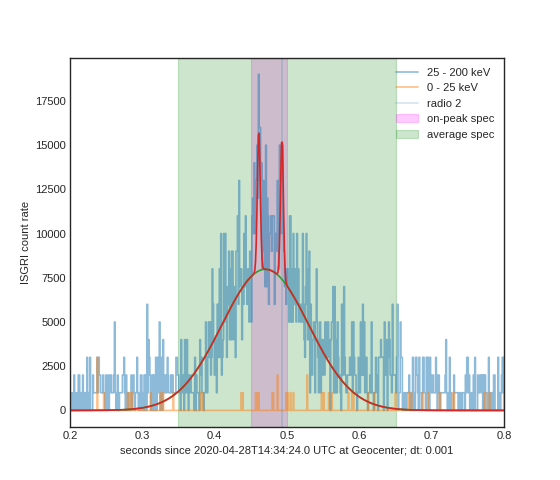

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.
/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Saw kwargs ['ds', 'drawstyle'] which are all aliases for 'drawstyle'.  Kept value from 'drawstyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.
/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: Ru

In [246]:
ebands = [(25,200), (0,25),]

plt.figure(figsize=(7,6))

rates={}

bins = None

for e1,e2 in ebands:
    m = i_evts_en['ISGRI_ENERGY']>=e1
    m &= i_evts_en['ISGRI_ENERGY']<e2

    t_plot_s = (i_evts['TIME'] + dt_intgeo/24/3600 -t_refplot_ijd)*24*3600

    m &= np.abs(t_plot_s)<2
    
    if bins is None:
        _ts = t_plot_s[m]
        bins=np.linspace(_ts.min(), _ts.max(), int((_ts.max()-_ts.min())/0.001))
    
    h = np.histogram(t_plot_s[m], bins=bins)
    
    if isinstance(bins, int):
        bins = h[1]
    
    tc = (h[1][1:] + h[1][:-1])*0.5
    dt = (h[1][1:] - h[1][:-1])
    rate = h[0]/dt
    rate_err = h[0]**0.5/dt
    
    rates[(e1,e2)] = dict(
        rate = rate,
        rate_err = rate_err,
        tc = tc,
        dt = dt,
    )
    
    if False:
        plt.errorbar(
        tc,
        rate,
        rate_err,
        ds="steps-mid",
        label="%.5lg - %.5lg keV"%(e1,e2),
    )
    
    plt.step(
        tc,
        rate,
        ds="steps-mid",
        label="%.5lg - %.5lg keV"%(e1,e2),
        alpha=0.5,
    )
    

    
#plt.axvspan(
#    (t_radio_p1_ijd - t_refplot_ijd)*24*3600 - radiotopo_s,
#    (t_radio_p2_ijd - t_refplot_ijd)*24*3600 + radiotopo_s,
#    alpha=0.2,
#)

#plt.axvline(
#    (t_radio_detinf_ijd - t_refplot_ijd)*24*3600,
#    alpha=0.5,
#    label="radio ref",
#    lw=2,
#)


#plt.axvline(
#    (t_radio_p1_ijd - t_refplot_ijd)*24*3600,
#    alpha=0.2,
#    label="radio 1",
#)

plt.axvline(
    (t_radio_p2_ijd - t_refplot_ijd)*24*3600,
    alpha=0.2,
    label="radio 2",
)

#print("dt:")

t_r1_r = 0.461
t_w_r12_r = 0.002
t_r2_r =t_r1_r + 0.032

bkg = norm(0.47, 0.06).pdf(tc)*1200
r1 = norm(t_r1_r, t_w_r12_r).pdf(tc)*40
r2 = norm(t_r2_r, t_w_r12_r).pdf(tc)*40

plt.plot(tc,bkg)
#plt.plot(tc,r1)
#plt.plot(tc,r2)
plt.plot(tc,r2+r1+bkg)


plt.xlim([.2, 0.8])
#plt.xlim([.40, 0.55])
plt.ylabel("ISGRI count rate")
plt.xlabel("seconds since "+t_refplot_utc+" UTC at Geocenter; dt: %.3lg"%np.mean(dt))

plt.axvspan(0.45, 0.5, alpha=0.2, color='magenta', label='on-peak spec')
plt.axvspan(0.35, 0.65, alpha=0.2, color='green', label='average spec')
    
plt.legend()

plt.savefig("lc_peakandspec.pdf")

plt.show()

In [ ]:
ic.converttime("IJD", 58969.9048669008-51544 - 8.36/24/3600, "ANY")

In [253]:
ic.get_sc('2020-04-30T21:41:51.316', ra=source_coord.ra.deg, dec=source_coord.dec.deg)

{'barytime': 0.07125369797801828,
 'bodies': {'earth': {'body_dec': -53.57,
   'body_distance': 0,
   'body_in_sc': [80.16967531442154, -32.23482449631183],
   'body_ra': 18.82499999999999,
   'body_size': 4.3194945239184435,
   'integral_parallax': 57.295779513082316,
   'separation': 84507.90000000001},
  'moon': {'body_dec': -53.57,
   'body_distance': 376874.8742453358,
   'body_in_sc': [121.41370456060635, 100.73341169600569],
   'body_ra': 18.82499999999999,
   'body_size': 0.2927952930252025,
   'integral_parallax': 14.244971412460858,
   'separation': 339905.63163068856},
  'sun': {'body_dec': -53.57,
   'body_distance': 150730312.27681994,
   'body_in_sc': [105.65696119323488, 0.18882980453800619],
   'body_ra': 18.82499999999999,
   'body_size': 0.26440138028911403,
   'integral_parallax': 0.03211729970581345,
   'separation': 150758191.0641505}},
 'd_scx': 12.931272712468594,
 'd_scy': 100.21123025121076,
 'd_scz': 82.15050745653656,
 'dyz_scy': 142.39051276634038,
 'dyz_scz

In [256]:
source_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (293.732, 21.89672222)>

<IPython.core.display.Javascript object>


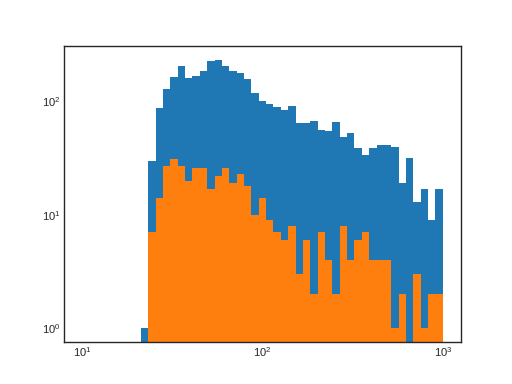

[]

In [230]:
#i_evts[m]['']

plt.figure()

plt.hist(
    i_evts_en[m]['ISGRI_ENERGY'][i_evts_en[m]['SELECT_FLAG']==0],
    np.logspace(1,3)
)

plt.hist(
    i_evts_en[m]['ISGRI_ENERGY'][i_evts_en[m]['SELECT_FLAG']!=0],
    np.logspace(1,3)
)


plt.loglog()

In [228]:
sum(m_off)

3046

In [149]:
t_plot_s = (i_evts['TIME'] + dt_intgeo/24/3600 -t_refplot_ijd)*24*3600


m = i_evts_en['ISGRI_ENERGY']>=25
m &= i_evts_en['ISGRI_ENERGY']<2000
m &= np.abs(t_plot_s)<2    

m_off = i_evts_en['ISGRI_ENERGY']>=20
m_off &= i_evts_en['ISGRI_ENERGY']<2000
m_off &= np.abs(t_plot_s-10)<2    


sum(m),sum(m_off)

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  
/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


(4142, 3046)

<IPython.core.display.Javascript object>


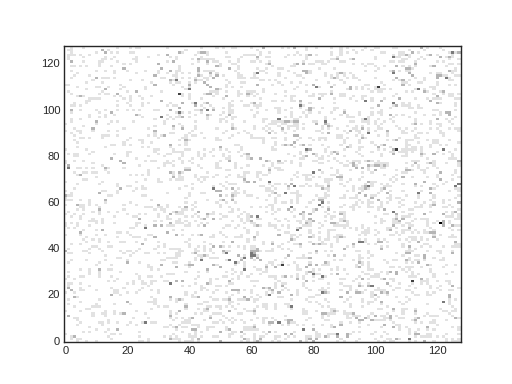

In [180]:
plt.figure()

plt.hist2d(
    i_evts['ISGRI_Y'][m],
    i_evts['ISGRI_Z'][m],
    (
        np.linspace(-0.5, 127.5, 129),
        np.linspace(-0.5, 127.5, 129)
     )
)

plt.show()

In [131]:
from scipy import stats

<IPython.core.display.Javascript object>


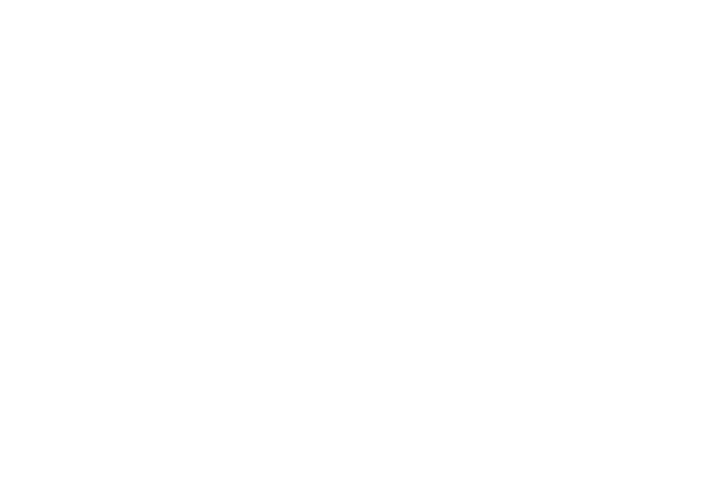

NameError: name 'NullFormatter' is not defined

In [132]:
plt.figure(figsize=(9,6))

emin=20.
emax=300.

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]


axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx, label="hx")
axHisty = plt.axes(rect_histy, label="hy")

m_on = t_plot_s>0.2
m_on &= t_plot_s<0.8

m_off = t_plot_s>0.2-2
m_off &= t_plot_s<0.8-2

m_on &= i_evts_en['ISGRI_ENERGY']>emin
m_on &= i_evts_en['ISGRI_ENERGY']<emax

h2 = np.histogram2d(
    t_plot_s[m_on],
    i_evts_en['ISGRI_ENERGY'][m_on],
    (np.linspace(t_plot_s[m_on].min(),t_plot_s[m_on].max(),300),
     np.logspace(np.log10(emin),np.log10(emax),30))
)

from scipy.ndimage.filters import gaussian_filter

fmap = gaussian_filter(h2[0], (3, 3))

axScatter.contour(
    h2[1][:-1], 
    h2[2][:-1], 
    np.transpose(
        fmap
    ),    
    levels=np.logspace(-0.5, np.log10(fmap.max()),7),
    cmap='gray_r',
    alpha=1.
)


axScatter.contourf(
        h2[1][:-1], 
        h2[2][:-1], 
        np.transpose(h2[0]),    
        levels=np.logspace(-0.5, np.log10(h2[0].max()),int(h2[0].max())),
        cmap='gray_r',
        alpha=0.5
    )



axScatter.semilogy()

axScatter.set_yticks([30., 50., 100., 200.], ["30 keV", "50 keV", "100 keV", "200 keV"])

axScatter.set_xlabel("seconds since "+t_refplot_utc+" UTC at Geocenter")
axHistx.set_title("ISGRI count rate")

axHistx.step(
                h2[1][:-1],
                h2[0].sum(1),
                c='gray'
            )

axHisty.errorbar(
                h2[0][:,:].sum(0),
                h2[2][:-1], 
                xerr=h2[0].sum(0)**0.5,
                ds='steps',
                c='gray'
            )

axHisty.semilogy()


# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.savefig("burst_2dplot.pdf")

#plt.show()


<IPython.core.display.Javascript object>


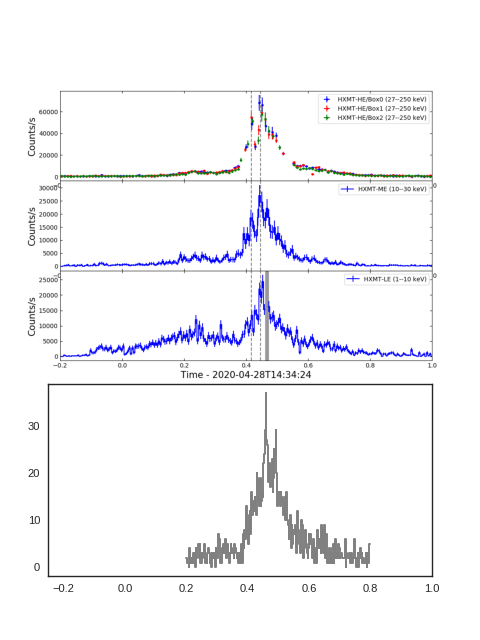

(-0.25, 1.0)

In [766]:
import io

r=requests.get("http://newshxmt.ihep.ac.cn/images/grb/SGR1935_3rd_atel.png")

import matplotlib.image as img 
insight_im = img.imread(io.BytesIO(r.content))

plt.figure(figsize=(6,8))
ax1 = plt.axes([0,0.35,1,0.6])

ax1.imshow(insight_im)
ax1.set_axis_off()

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]



ax2=plt.axes([0.1,0.1,0.8,0.3])
ax2.step(
                h2[1][:-1],
                h2[0].sum(1),
                c='gray'
            )

ax2.set_xlim([-0.25, 1.])

In [708]:
sum(m_on)

1711

<IPython.core.display.Javascript object>


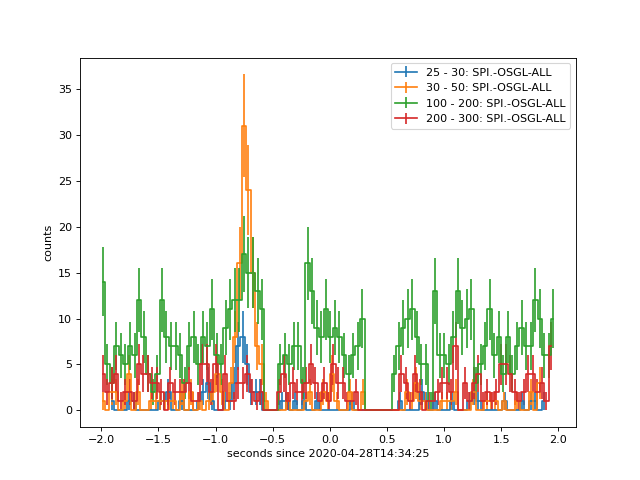

1124229 SPI.-OSGL-ALL
481131 SPI.-OPSD-ALL
no to PSD
450 SPI.-OCRV-ALL
too few events
201773 SPI.-OME2-ALL
too many energies events
38079 SPI.-OME3-ALL
too few events
6613 SPI.-OME4-ALL
too few events
1126 SPI.-OME5-ALL
too few events
227 SPI.-OMEH-ALL
too few events
13852 SPI.-OMP3-ALL
too few events
511 SPI.-OMP4-ALL
too few events
25 SPI.-OMP5-ALL
too few events
263 SPI.-GNRL-GTI
no time


In [223]:
plt.figure(figsize=(8,6))

for s_e in fits.open("/mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/scw/2222/222200240010.000/spi_oper.fits.gz")[1:]:
    print(len(s_e.data), s_e.header['EXTNAME'])
    
    s_evts = s_e.data
    
    if 'TIME' not in s_evts.columns.names:
        print("no time")
        continue
        
    if len(s_e.data)<1e5:
        print("too few events")
        continue
        
    if len(s_evts['ENERGY'].shape)>1:
        print("too many energies events")
        continue
        
    if 'PSD' in s_e.header['EXTNAME']:
        print("no to PSD")
        continue
    

    for e1,e2 in [(25,30), (30,50), (100,200), (200, 300)]:
        t_rel_s = (s_evts['TIME']-t0_ijd)*24*3600

        m = s_evts['ENERGY']>e1
        m &= s_evts['ENERGY']<e2
        m &= np.abs(t_rel_s)<2


        h = np.histogram(t_rel_s[m], 100)

        plt.errorbar(
            h[1][:-1],
            h[0],
            h[0]**0.5,
            ds='steps-mid',
            label="%.5lg - %.5lg: %s"%(e1,e2,s_e.header['EXTNAME']),
        )

plt.ylabel("counts")
plt.xlabel("seconds since "+t0_utc)
plt.legend()

<IPython.core.display.Javascript object>


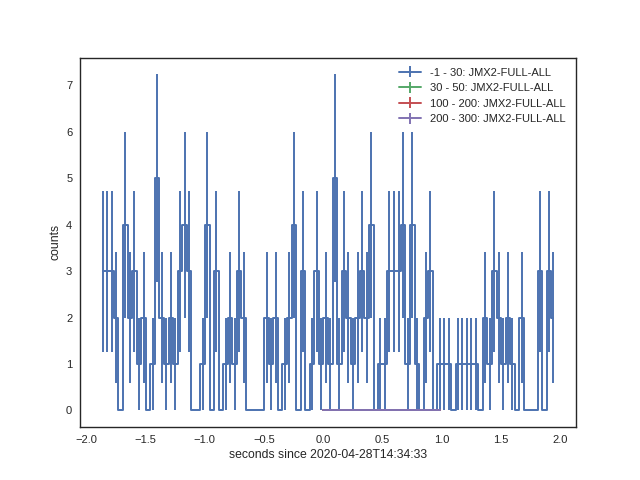

792 JMX2-FULL-PRW
no time
2 JMX2-FULL-SRW
no time
72568 JMX2-FULL-ALL


In [717]:
plt.figure(figsize=(8,6))

for s_e in fits.open("/mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/scw/2222/222200240010.000/jmx2_events.fits.gz")[1:]:
    print(len(s_e.data), s_e.header['EXTNAME'])
    
    s_evts = s_e.data
    
    if 'TIME' not in s_evts.columns.names:
        print("no time")
        continue
        
    if len(s_e.data)<1e4:
        print("too few events")
        continue
        
    if len(s_evts['ENERGY'].shape)>1:
        print("too many energies events")
        continue
        
    if 'PSD' in s_e.header['EXTNAME']:
        print("no to PSD")
        continue
    

    for e1,e2 in [(-1,30), (30,50), (100,200), (200, 300)]:
        t_rel_s = (s_evts['TIME']-t0_ijd)*24*3600

        m = s_evts['ENERGY']>e1
        m &= s_evts['ENERGY']<e2
        m &= np.abs(t_rel_s)<2


        h = np.histogram(t_rel_s[m], 100)

        plt.errorbar(
            h[1][:-1],
            h[0],
            h[0]**0.5,
            ds='steps-mid',
            label="%.5lg - %.5lg: %s"%(e1,e2,s_e.header['EXTNAME']),
        )
    break

plt.ylabel("counts")
plt.xlabel("seconds since "+t0_utc)
plt.legend()

In [235]:
#rmf = fits.open("/mnt/sshfs/isdc-in01//unsaved_data/savchenk/data/reduced/ddcache//global/ISGRISpectraSum.v5.8.2.extractall//89b7966a/rmf_sum_SGR_1935+2154.fits.gz")
rmf = fits.open("/mnt/sshfs/isdc-in01//gpfs0/savchenk/work/tmp/RebinResponse_command_line/rsp_rebinned.fits")
ce1 = rmf[1].data['E_MIN']
ce2 = rmf[1].data['E_MAX']

ce1.shape

(128,)

In [203]:
import pandas as pd

binspec = []

bindetemaps = fits.open("/mnt/sshfs/isdc-in01/unsaved_data/savchenk/data/reduced/ddcache/byscw/2222/222200240010.000/BinEventsSpectra.v3.11/f5d74bfd/isgri_detector_shadowgram_BIN_S.fits.gz")[2:]

for e in bindetemaps:
    binspec.append(dict(
        e1=e.header['E_MIN'],
        e2=e.header['E_MAX'],
        counts=e.data.sum()
                  ))

    
bineffi = []

bineffimaps = fits.open("/mnt/sshfs/isdc-in01/unsaved_data/savchenk/data/reduced/ddcache//byscw/2222/222200240010.000/BinEventsSpectra.v3.11//f5d74bfd/isgri_efficiency_shadowgram_BIN_S.fits.gz")[2:]

for e in bineffimaps:
    bineffi.append(dict(
        e1=e.header['E_MIN'],
        e2=e.header['E_MAX'],
        meaneffi=e.data.sum()
                  ))


bineffi = pd.DataFrame(bineffi)

bineffi

binspec = pd.DataFrame(binspec)

binspec

,e1,e2,counts
0,12.5,13.5,0
1,13.5,14.5,0
2,14.5,15.5,1
3,15.5,16.5,0
4,16.5,18.0,1
...,...,...,...
123,956.0,970.0,1
124,970.0,984.5,1
125,984.5,999.5,1
126,999.5,1014.5,0


<IPython.core.display.Javascript object>


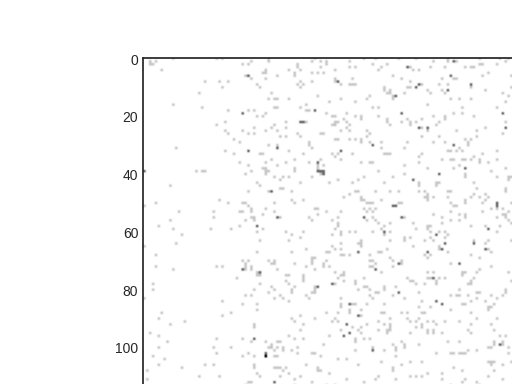

0.0

In [210]:
j1=0
j2=21
c = bindetemaps[j1].data.copy()
for i in range(j1,j2):
    c += bindetemaps[i].data.copy()
    
plt.figure()

plt.imshow(c)

sum(bineffimaps[40].data[c>0])

In [205]:
c.copy()

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 2, 1, 1],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [206]:
c.sum()

2535

<IPython.core.display.Javascript object>


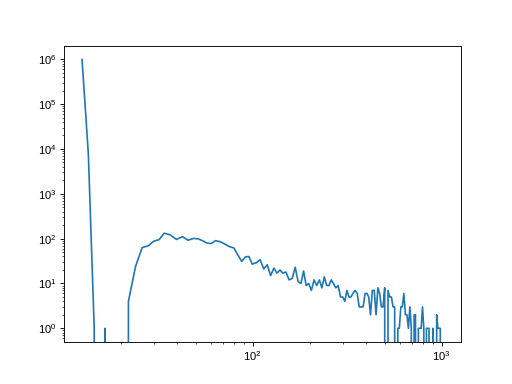

[]

In [87]:
plt.figure()

plt.plot(
    [ e.header['E_MIN'] for e in bindetemaps ],
    [ e.data.sum() for e in bindetemaps ],
)

plt.show()
plt.loglog()


In [62]:
bineffimaps[i1].data[bindetemaps[i1].data>0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

<IPython.core.display.Javascript object>


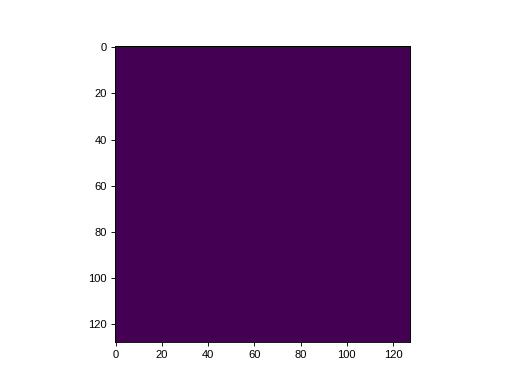

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [46]:
#f,axes=plt.subplots(2,2,figsize=(8,8))
plt.figure()

i1=19
i2=23

plt.imshow(bineffimaps[i1].data * bindetemaps[i1].data)
#axes[0][0].imshow(bineffimaps[i1].data)
#axes[0][1].imshow(bineffimaps[i2].data)
#axes[1][0].imshow(bindetemaps[i1].data)
#axes[1][1].imshow(bindetemaps[i2].data)

plt.show()

bineffimaps[i1].data[bindetemaps[i1].data>0]

<IPython.core.display.Javascript object>


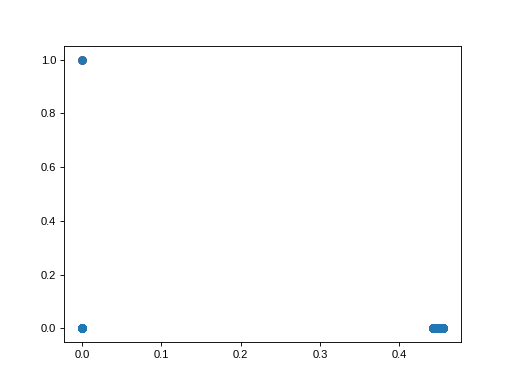

In [50]:
plt.figure()

plt.scatter(bineffimaps[i1].data.flatten(), bindetemaps[i1].data.flatten())

In [790]:


import pandas as pd
from collections import defaultdict

corshad = defaultdict(list)
for e in fits.open("/mnt/sshfs/isdc-in01/unsaved_data/savchenk/data/reduced/ddcache/byscw/2222/222200240010.000/ShadowUBCSpectra.v3/45b8b811/isgri_cor_shad_BIN_S.fits.gz")[2:]:
    print(e.header['EXTNAME'], e.header['SHD_TYPE'])
    
    corshad[e.header['SHD_TYPE']].append(dict(
        e1=e.header['E_MIN'],
        e2=e.header['E_MAX'],
        c=e.data.mean()
                  ))


corshad = { k:pd.DataFrame(v) for k,v in corshad.items()}
    
corshad['DETECTOR']

ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-C

ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY


,e1,e2,c
0,12.5,13.5,0.000000
1,13.5,14.5,0.000000
2,14.5,15.5,0.000057
3,15.5,16.5,0.000000
4,16.5,18.0,0.000057
...,...,...,...
123,956.0,970.0,0.000057
124,970.0,984.5,0.000062
125,984.5,999.5,0.000062
126,999.5,1014.5,0.000000


In [787]:


import pandas as pd
from collections import defaultdict

corshad_gb = defaultdict(list)
for e in fits.open("/mnt/sshfs/isdc-in01/unsaved_data/savchenk/data/reduced/ddcache/byscw/2222/222200240010.000/ghost_bustersSpectra.v2/400fcbaa/isgri_cor_shad_BIN_S_gb.fits.gz")[2:]:
    print(e.header['EXTNAME'], e.header['SHD_TYPE'])
    
    corshad_gb[e.header['SHD_TYPE']].append(dict(
        e1=e.header['E_MIN'],
        e2=e.header['E_MAX'],
        c=e.data.mean()
                  ))


corshad_gb = { k:pd.DataFrame(v) for k,v in corshad_gb.items()}
    
corshad_gb['DETECTOR']

ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-C

ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY
ISGR-CEXP-SHD DETECTOR
ISGR-CEXP-SHD VARIANCE
ISGR-CEXP-SHD EFFICIENCY


,e1,e2,c
0,12.5,13.5,0.000000
1,13.5,14.5,0.000000
2,14.5,15.5,0.000057
3,15.5,16.5,0.000000
4,16.5,18.0,0.000057
...,...,...,...
123,956.0,970.0,0.000057
124,970.0,984.5,0.000062
125,984.5,999.5,0.000062
126,999.5,1014.5,0.000000


SGR 1935+2154


<IPython.core.display.Javascript object>


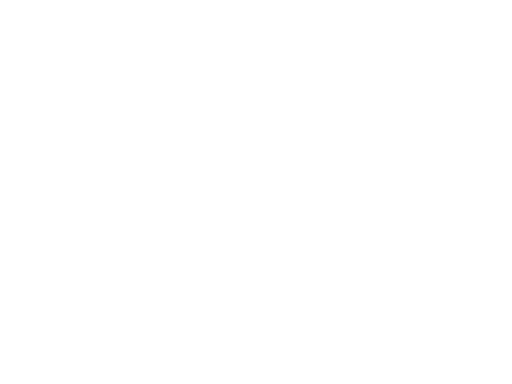

ValueError: operands could not be broadcast together with shapes (64,) (128,) 

In [233]:
spec_e = fits.open("/mnt/sshfs/isdc-in01//unsaved_data/savchenk/data/reduced/ddcache//byscw/2222/222200240010.000/ii_spectra_extract.v3//4aef2658/isgri_spectrum.fits.gz")[2]
print(spec_e.header['NAME'])

spec = spec_e.data

plt.figure()

plt.errorbar(
    (ce1+ce2)/2.,
    spec['RATE']/(ce2-ce1),
    spec['STAT_ERR']/(ce2-ce1),
    ds='steps-mid'
)

N=1
plt.errorbar(
    binspec.e1,
    binspec.counts / N,
    binspec.counts**0.5 / N,
    ds='steps-mid'
)

N=1
plt.plot(
    bineffi.e1,
    bineffi.meaneffi / 200,
    ds='steps-mid'
)


plt.plot(
    corshad['EFFICIENCY'].e1,
    corshad['EFFICIENCY'].c ,
    ds='steps-mid',
    label="corshad mean DETEFFICIENCYECTOR"
)



N = 1000
plt.plot(
    corshad['DETECTOR'].e1,
    corshad['DETECTOR'].c * N,
    ds='steps-mid',
    label="corshad mean DETECTOR * %.5lg"%N
)


if False:
    N=7
    plt.plot(
        corshad_gb['DETECTOR'].e1,
        corshad_gb['DETECTOR'].c/3 ,
        ds='steps-mid'
    )



    plt.plot(
        corshad_gb['VARIANCE'].e1,
        corshad_gb['VARIANCE'].c/3 ,
        ds='steps-mid'
    )

plt.xlim([0,200])
#plt.loglog()

plt.legend()

In [257]:
ic.converttime("IJD", 58969.9048669008-51544-8.36/24/3600.,"UTC")

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.9047701415374831/UTC


'2020-04-30T21:41:42.956'